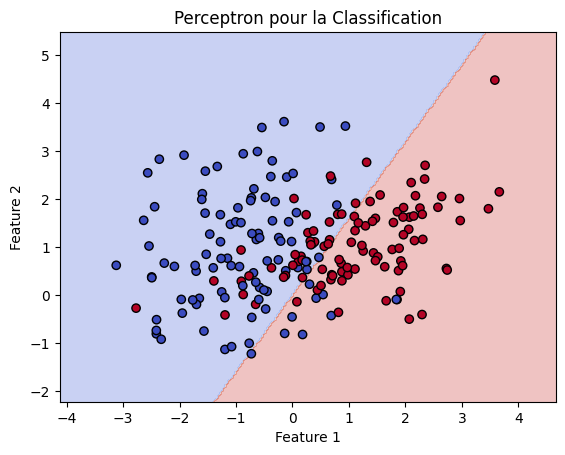

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron

# Générer un dataset bidimensionnel (2 classes, 2 features)
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Convertir les étiquettes {0,1} en {-1,1} pour le Perceptron
y = 2 * y - 1  

# Initialiser et entraîner le modèle Perceptron
perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron.fit(X, y)

# Définir une grille de points pour visualiser la frontière de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Calculer les prédictions sur la grille
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Perceptron pour la Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
